In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
dataframe = pd.read_csv('giachungcu.csv')

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81162 entries, 0 to 81161
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         81162 non-null  int64  
 1   month      81162 non-null  int64  
 2   project    78097 non-null  object 
 3   investor   65453 non-null  object 
 4   square     81162 non-null  float64
 5   bedrooms   81162 non-null  float64
 6   bathrooms  81162 non-null  float64
 7   direction  51086 non-null  object 
 8   balcony    54426 non-null  object 
 9   district   81162 non-null  object 
 10  ward       79506 non-null  object 
 11  price      81162 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 7.4+ MB


In [4]:
dataframe.head()

,id,month,project,investor,square,bedrooms,bathrooms,direction,balcony,district,ward,price
0,28086120,12,Vinhomes Smart City Đại Mỗ,Tập đoàn Vingroup,60.0,3.0,1.0,Đông-Nam,Tây-Bắc,nam tu liem,dai mo,1560.0
1,28088954,12,Goldmark City,Công ty TNHH Thương mại - Quảng cáo - Xây dựng...,121.0,3.0,2.0,NaN,NaN,bac tu liem,phu dien,3300.0
2,28097966,12,Chung cư IEC Tứ Hiệp,NaN,70.0,2.0,2.0,Tây-Bắc,Đông-Nam,thanh tri,tu hiep,1106.0
3,27895887,12,Vinhomes D'Capitale,Tân Hoàng Minh Group,39.0,1.0,1.0,Đông-Nam,Đông-Nam,cau giay,trung hoa,1500.0
4,28056031,12,The Zen Residence,Công ty TNHH Gamuda Land Việt Nam,97.0,3.0,2.0,NaN,NaN,hoang mai,hoang liet,2900.0


In [5]:
dataframe['price'].describe()

count    81162.000000
mean      2404.748090
std       1038.825418
min        350.000000
25%       1520.000000
50%       2300.000000
75%       3150.000000
max       5000.000000
Name: price, dtype: float64

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81162 entries, 0 to 81161
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         81162 non-null  int64  
 1   month      81162 non-null  int64  
 2   project    78097 non-null  object 
 3   investor   65453 non-null  object 
 4   square     81162 non-null  float64
 5   bedrooms   81162 non-null  float64
 6   bathrooms  81162 non-null  float64
 7   direction  51086 non-null  object 
 8   balcony    54426 non-null  object 
 9   district   81162 non-null  object 
 10  ward       79506 non-null  object 
 11  price      81162 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 7.4+ MB


In [7]:
so_gia_tri_nall = dataframe.isna().sum()
print(so_gia_tri_nall)

id               0
month            0
project       3065
investor     15709
square           0
bedrooms         0
bathrooms        0
direction    30076
balcony      26736
district         0
ward          1656
price            0
dtype: int64


In [8]:
dataframe.isna().sum()/dataframe.shape[0]*100

id            0.000000
month         0.000000
project       3.776398
investor     19.355117
square        0.000000
bedrooms      0.000000
bathrooms     0.000000
direction    37.056751
balcony      32.941524
district      0.000000
ward          2.040364
price         0.000000
dtype: float64

In [9]:
dataframe['bathrooms'] = dataframe['bathrooms'].astype(float)
dataframe['bedrooms'] = dataframe['bathrooms'].astype(float)
dataframe['square'] = dataframe['square'].astype(float)

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81162 entries, 0 to 81161
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         81162 non-null  int64  
 1   month      81162 non-null  int64  
 2   project    78097 non-null  object 
 3   investor   65453 non-null  object 
 4   square     81162 non-null  float64
 5   bedrooms   81162 non-null  float64
 6   bathrooms  81162 non-null  float64
 7   direction  51086 non-null  object 
 8   balcony    54426 non-null  object 
 9   district   81162 non-null  object 
 10  ward       79506 non-null  object 
 11  price      81162 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 7.4+ MB


In [11]:
dataframe.head

<bound method NDFrame.head of              id  month                                    project  \
0      28086120     12                 Vinhomes Smart City Đại Mỗ   
1      28088954     12                              Goldmark City   
2      28097966     12                       Chung cư IEC Tứ Hiệp   
3      27895887     12                        Vinhomes D'Capitale   
4      28056031     12                          The Zen Residence   
...         ...    ...                                        ...   
81157  25598786      5  Khu đô thị Kim Văn - Kim Lũ (Golden Silk)   
81158  22545821      5                           Goldsilk Complex   
81159  25601798      5                      A10-A14 Nam Trung Yên   
81160  25603729      5                                        NaN   
81161  25608756      5                            Lotus Lake View   

                                                investor  square  bedrooms  \
0                                      Tập đoàn Vingroup    60.

In [12]:
X = dataframe.iloc[:,[4,5,6]]
Y = dataframe.iloc[:,[11]]

In [13]:
#Lấy các cột chứa dữ liệu về diện tích,phòng tắm,phòng ngủ,giá nhà
frame1 = dataframe[['square','bedrooms','bathrooms','price']]

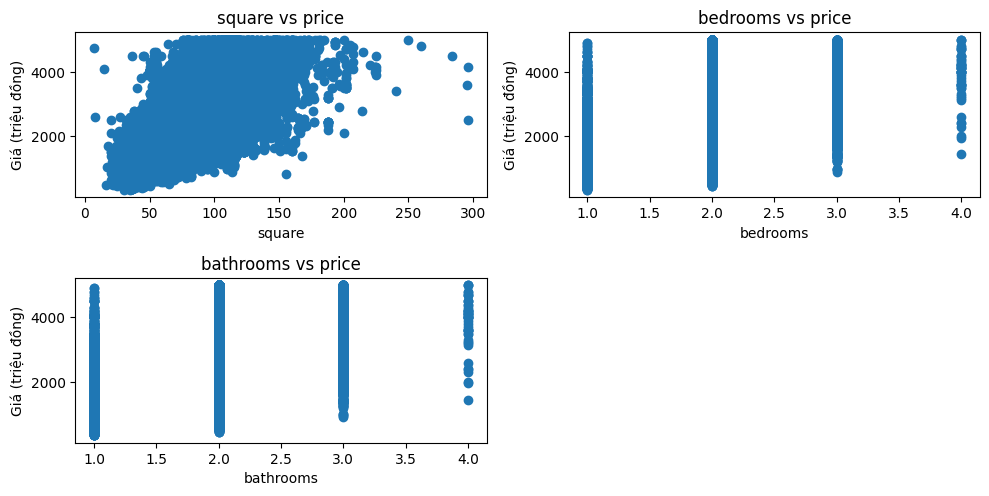

In [14]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(frame1[x],frame1['price'])
    plt.title(x+' vs price')
    plt.ylabel('Giá (triệu đồng)')
    plt.xlabel(x)


plt.figure(figsize=(10,12))

scatter('square', 1)
scatter('bedrooms', 2)
scatter('bathrooms', 3)

plt.tight_layout()

In [15]:
#Lấy các cột chứa dữ liệu về hướng nhà,ban công,vị trí,giá nhà
frame2 = dataframe[['direction','balcony','district','price']]

In [16]:
def bieudien(col) :
    temp = frame2.copy()
    table = temp.groupby([col])['price'].mean()
    plt.rcParams['figure.figsize'] = (18, 8)
    df = pd.DataFrame(table)
    df.plot.bar()
    plt.title("Yếu tố ảnh hưởng đến giá nhà")
    plt.ylabel("Giá trung bình")
    plt.show()


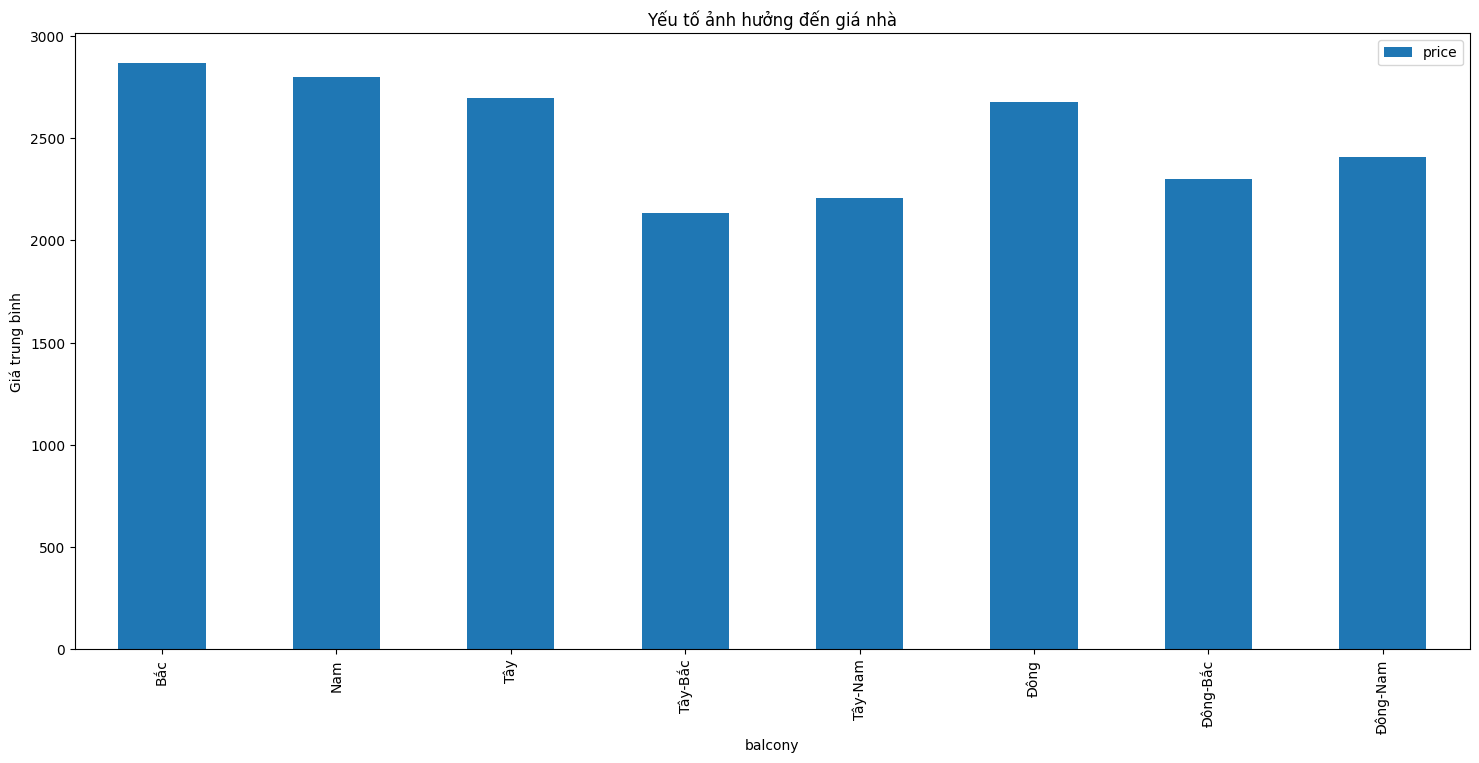

In [17]:
bieudien('balcony')

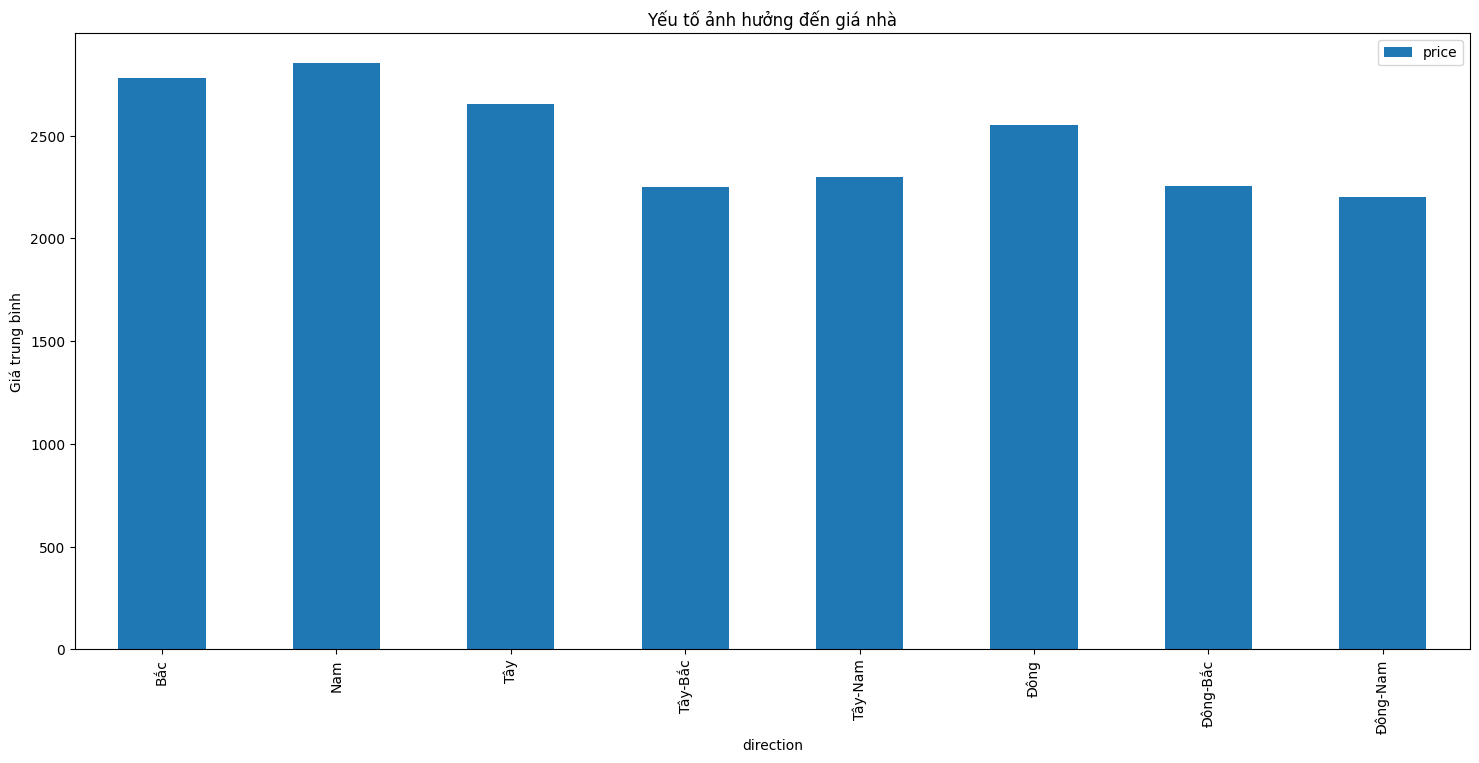

In [18]:
bieudien('direction')

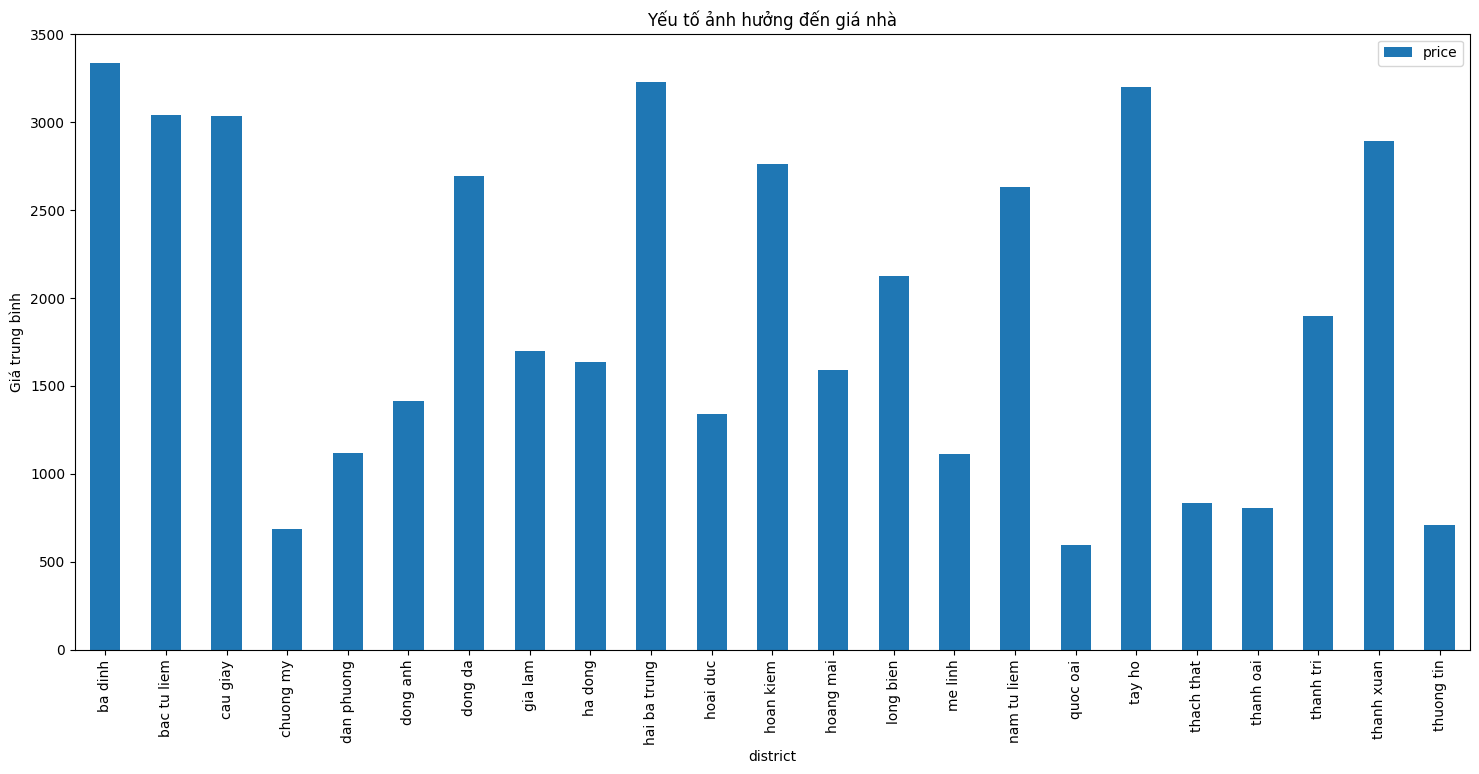

In [19]:
bieudien('district')

MÔ HÌNH DỰ ĐOÁN

In [20]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, train_size=0.8, test_size=0.2, random_state=0)

In [21]:
#Chuẩn hóa dữ liệu
x_max = np.max(X_train, axis=0)
x_min = np.min(X_train, axis=0)
X_train = (X_train - x_min)/(x_max - x_min)
X_test = (X_test - x_min)/(x_max - x_min)

y_mean = np.mean(Y_train,axis=0)
y_std = np.std(Y_test,axis=0)
Y_train = (Y_train - y_mean)/y_std
Y_test = (Y_test - y_mean)/y_std
print(X_train)
print(X_test)
# add bias
one = np.ones((X_train.shape[0], 1))
data_train = np.concatenate((one, X_train), axis = 1)
one = np.ones((X_test.shape[0], 1))
data_test = np.concatenate((one, X_test), axis = 1)

         square  bedrooms  bathrooms
54052  0.346021  0.333333   0.333333
60305  0.346021  0.333333   0.333333
5242   0.262976  0.333333   0.333333
33708  0.328720  0.333333   0.333333
32284  0.159170  0.000000   0.000000
...         ...       ...        ...
21243  0.148789  0.333333   0.333333
45891  0.366782  0.333333   0.333333
42613  0.217993  0.333333   0.333333
43567  0.311419  0.333333   0.333333
68268  0.252595  0.000000   0.000000

[64929 rows x 3 columns]
         square  bedrooms  bathrooms
56122  0.460208  0.666667   0.666667
32248  0.114187  0.000000   0.000000
13094  0.491349  0.333333   0.333333
45191  0.211073  0.333333   0.333333
36527  0.169550  0.333333   0.333333
...         ...       ...        ...
79516  0.294118  0.333333   0.333333
46789  0.432526  0.333333   0.333333
44333  0.131488  0.000000   0.000000
28858  0.328720  0.333333   0.333333
41663  0.304498  0.333333   0.333333

[16233 rows x 3 columns]


In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)

(64929, 3)
(16233, 3)
(16233, 1)


Chạy mô hình LinearRegression

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [24]:
#Dự đoán sử dụng dữ liệu test
Y_pre_test = model.predict(X_test)
mse_test = mean_squared_error(Y_test,Y_pre_test)
r2_score_test = r2_score(Y_test,Y_pre_test)
print("MSE-Test : ",mse_test)
print("R2-Score-Test: ",r2_score_test)

MSE-Test :  0.44708265288789995
R2-Score-Test:  0.5529173471121


In [25]:
Y_test1 = Y_test
Y_test1['gia du doan'] = Y_pre_test
print(Y_test1)

          price  gia du doan
56122  0.429687     1.592454
32248 -0.870092    -1.218485
13094  1.704415     1.960618
45191 -1.255498    -0.474440
36527 -1.525282    -0.835158
...         ...          ...
79516  0.286124     0.247117
46789  1.442340     1.449510
44333 -1.159146    -1.068177
28858  0.334299     0.547655
41663  0.478826     0.337202

[16233 rows x 2 columns]


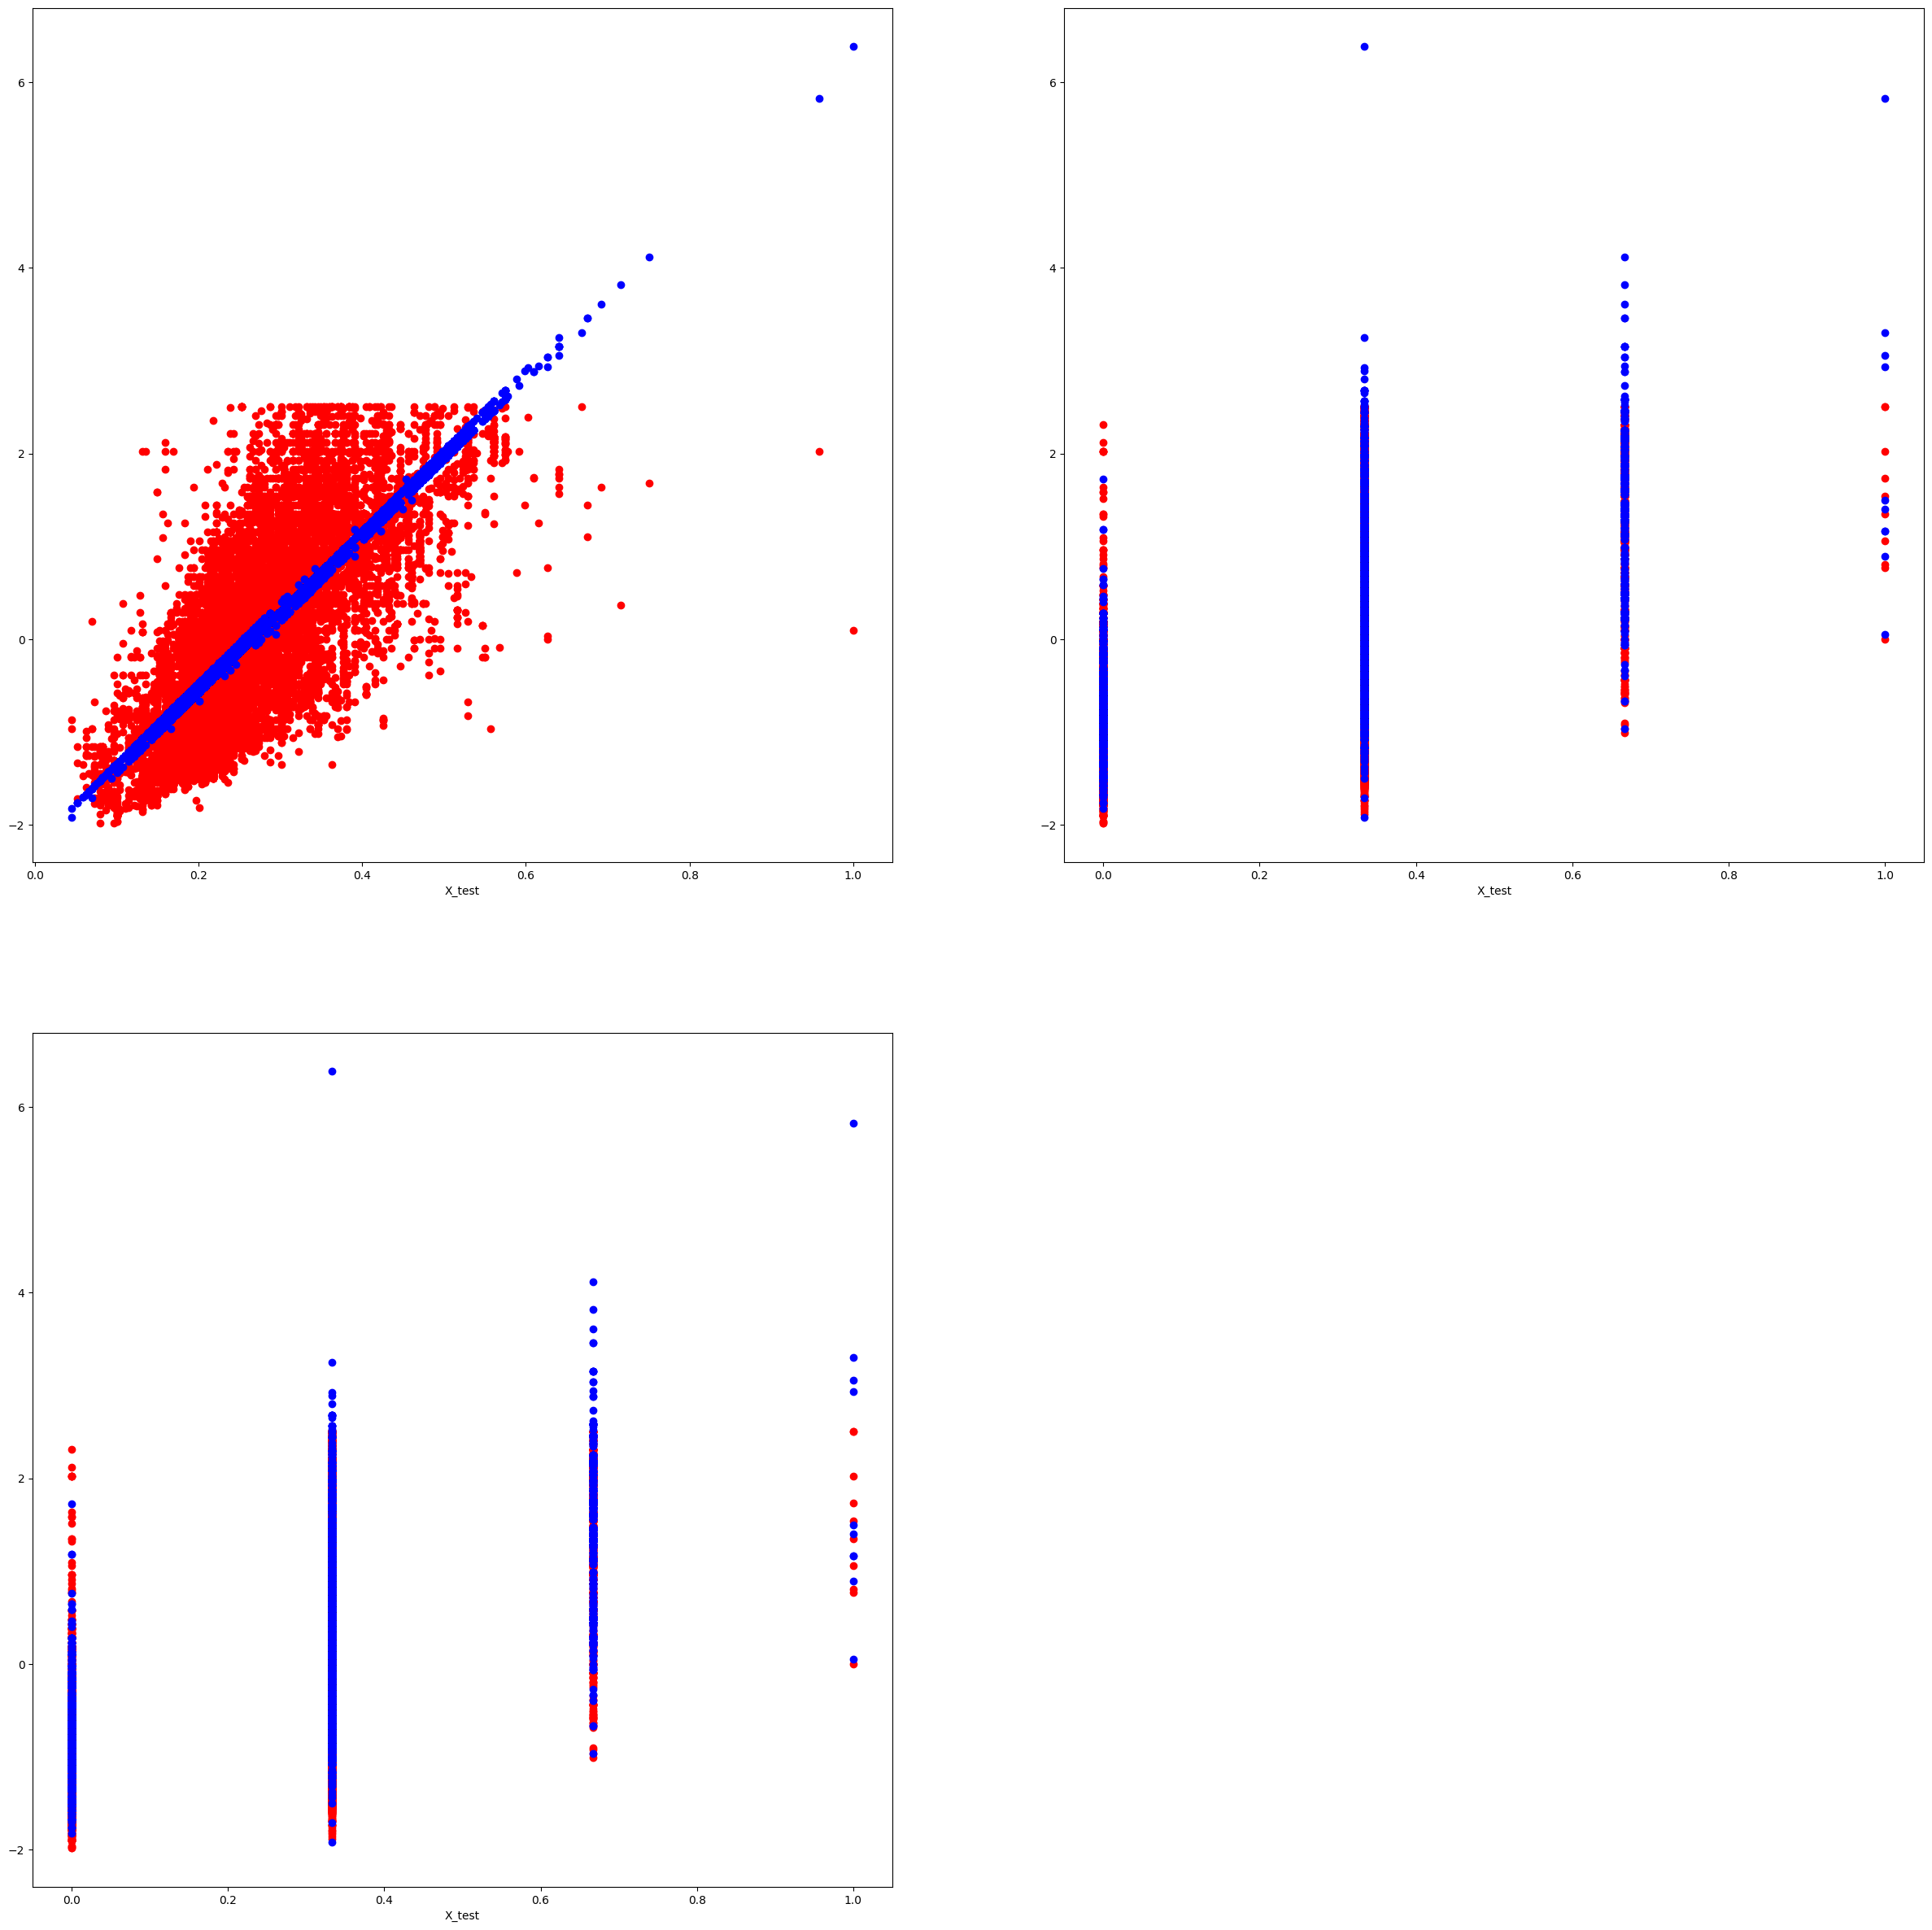

In [38]:
for i in range(3):
    plt.subplot(2,2,i+1)
    plt.rcParams['figure.figsize'] = [15, 15]
    plt.scatter(X_test.iloc[:,i],Y_test1['price'],color='red')
    plt.scatter(X_test.iloc[:,i],Y_pre_test,color='blue')
    # plt.xlabel(data_test.columns.values[i])
    plt.xlabel("X_test")
plt.show()


In [27]:
#Dự đoán sử dụng dữ liệu train
Y_pre_train = model.predict(X_train)
mse_train = mean_squared_error(Y_train,Y_pre_train)
r2_score_train = r2_score(Y_train,Y_pre_train)
print("MSE-Train: ",mse_train)
print("R2-Score-Train: ",r2_score_train)

MSE-Train:  0.440780438222377
R2-Score-Train:  0.5602212478922985


In [28]:
Y_train1 = Y_train
Y_train1['gia du doan'] = Y_pre_train
print(Y_train1)

          price  gia du doan
54052  1.345988     0.698045
60305 -0.243809     0.698045
5242   1.249637    -0.023512
33708 -0.436511     0.547655
32284 -0.374847    -0.827682
...         ...          ...
21243 -1.303673    -1.015578
45891  1.008759     0.878343
42613 -1.284403    -0.414260
43567  1.731394     0.397386
68268 -1.255498    -0.016014

[64929 rows x 2 columns]


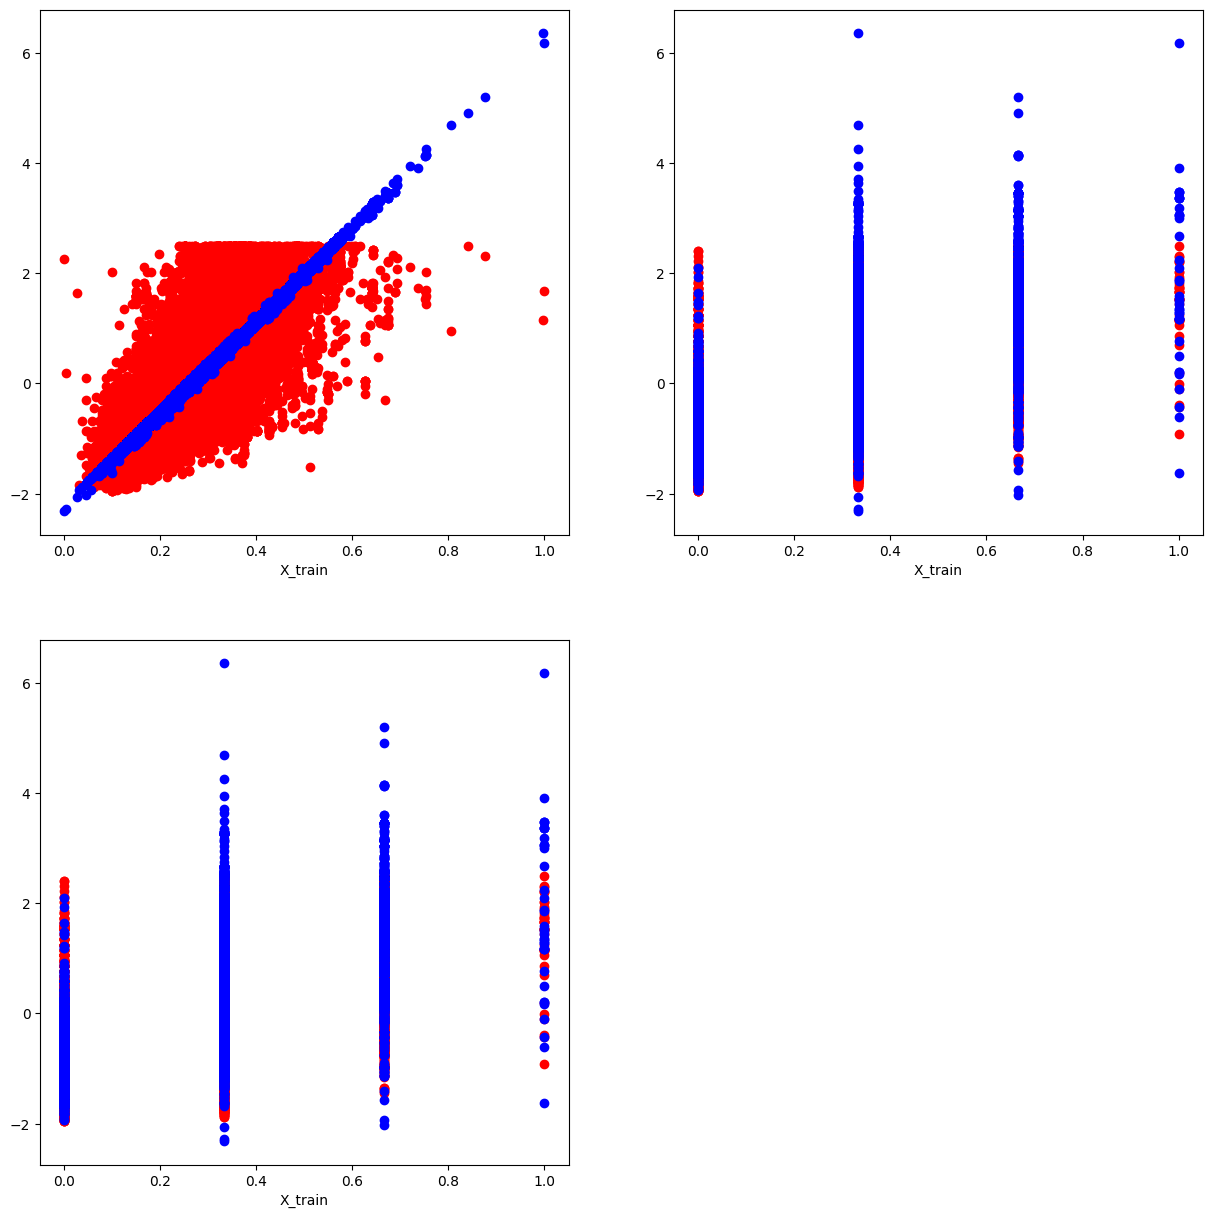

In [39]:
for i in range(3):
    plt.subplot(2,2,i+1)
    plt.rcParams['figure.figsize'] = [15, 15]
    plt.scatter(X_train.iloc[:,i],Y_train1['price'],color='red')
    plt.scatter(X_train.iloc[:,i],Y_pre_train,color='blue')
    # plt.xlabel(data_train.columns.values[i])
    plt.xlabel("X_train")
plt.show()

Chạy mô hình hồi quy LASSO

In [30]:
from sklearn.linear_model import Lasso
alpha = 0.01
lasso_reg = Lasso(alpha=alpha)
lasso_reg.fit(X_train,Y_train1['price'])

Lasso(alpha=0.01)

In [31]:
#Dự đoán sử dụng dữ liệu test
Y_pred_ls_test = lasso_reg.predict(X_test)
mse_test_ls = mean_squared_error(Y_test1['price'],Y_pred_ls_test)
r2_score_test_ls = r2_score(Y_test1['price'],Y_pred_ls_test)
print("MSE : ",mse_test_ls)
print("r2_score : ",r2_score_test_ls)

MSE :  0.4594789640798782
r2_score :  0.5405210359201218


In [32]:
#Dự đoán sử dụng dữ liệu train
Y_pred_ls_train = lasso_reg.predict(X_train)
mse_train_ls = mean_squared_error(Y_train1['price'],Y_pred_ls_train)
r2_score_train_ls = r2_score(Y_train1['price'],Y_pred_ls_train)
print("MSE : ",mse_train_ls)
print("r2_score : ",r2_score_train_ls)

MSE :  0.4542188120887028
r2_score :  0.5468134131137778


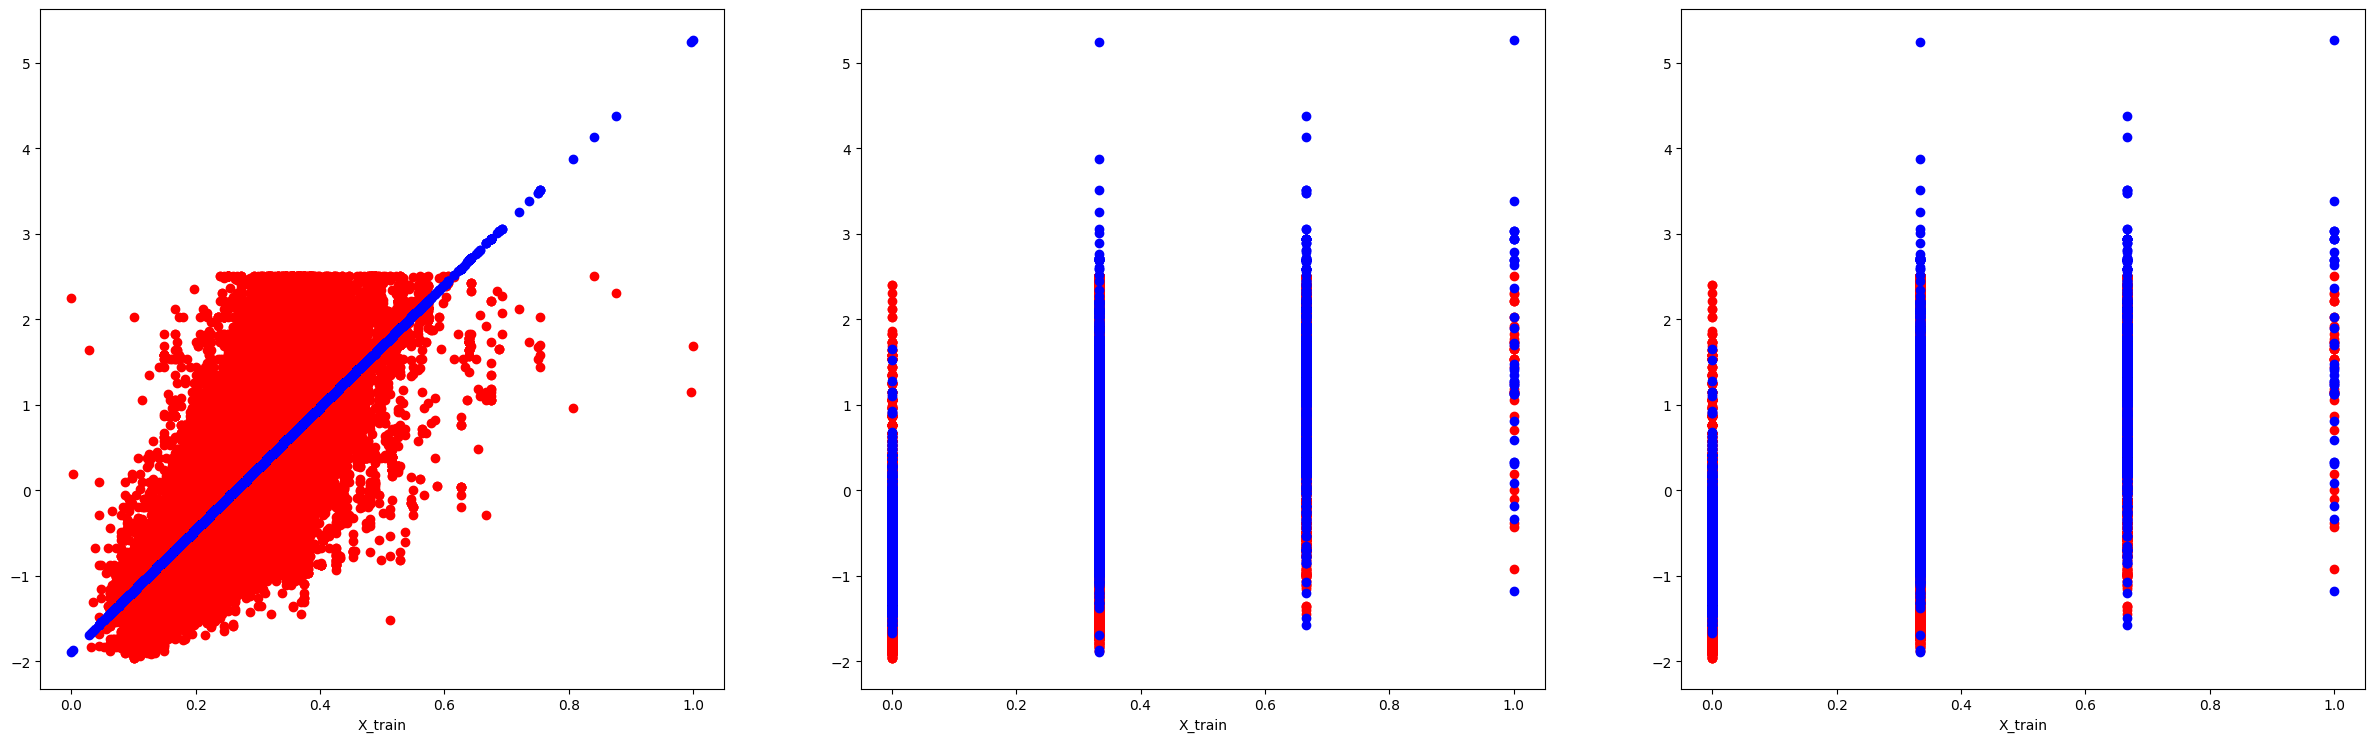

In [33]:
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.rcParams['figure.figsize'] = [30, 30]
    plt.scatter(X_train.iloc[:,i],Y_train1['price'],color='red')
    plt.scatter(X_train.iloc[:,i],Y_pred_ls_train,color='blue')
    # plt.xlabel(data_train.columns.values[i])
    plt.xlabel("X_train")
plt.show()

Chạy mô hình hồi quy RIDGE

In [34]:
from sklearn.linear_model import Ridge
alpha2 = 1
ridge_reg = Ridge(alpha=alpha2)
ridge_reg.fit(X_train,Y_train1['price'])

Ridge(alpha=1)

In [35]:
#Dự đoán sử dụng dữ liệu test
Y_pred_ri_test = ridge_reg.predict(X_test)
mse_test_ri = mean_squared_error(Y_test1['price'],Y_pred_ri_test)
r2_score_test_ri = r2_score(Y_test1['price'],Y_pred_ri_test)
print("MSE : ",mse_test_ri)
print("r2_score : ",r2_score_test_ri)

MSE :  0.4469828681281478
r2_score :  0.5530171318718522


In [36]:
#Dự đoán sử dụng dữ liệu train
Y_pred_ri_train = ridge_reg.predict(X_train)
mse_train_ri = mean_squared_error(Y_train1['price'],Y_pred_ri_train)
r2_score_train_ri = r2_score(Y_train1['price'],Y_pred_ri_train)
print("MSE : ",mse_train_ri)
print("r2_score : ",r2_score_train_ri)

MSE :  0.4407684612882435
r2_score :  0.5602331976085076
